---
title: "from the ground up"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

## the scenario

Imagine we're in a room with a large group of people. We know the group consists of men and women, and we have height measurements for everyone. Someone walks in, we measure their height, but we don't know if they are a man or a woman. Our goal is to figure out the probability that this person is a man, given their height. For simplicity, let's say that heights are categorized into three groups: short, medium, and tall. The breakdown of the group is as follows:

|         | Short | Medium | Tall |
|---------|-------|--------|------|
| **Man** |   15  |   30   |  20  |
| **Woman** |  25  |   35   |  10  |

## joint and conditional probabilities

**What is the probability that a person is both a man and tall?**

This is the same as asking: what fraction does the rectangle on the bottom left have with respect to the whole area?

In [2]:
#| code-summary: "import libraries"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.5)

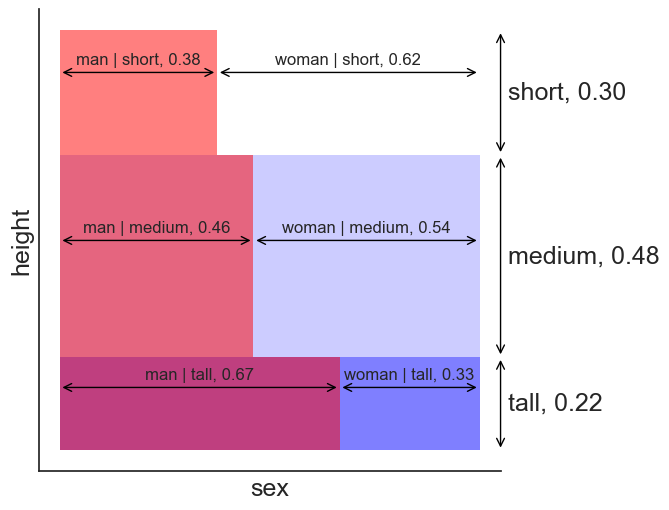

In [57]:
#| code-summary: "visualize"
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')

m1, m2, m3 = 15, 30, 20
f1, f2, f3 = 25, 35, 10

m = m1 + m2 + m3
f = f1 + f2 + f3
total = m + f
h1 = m1 + f1
h2 = m2 + f2
h3 = m3 + f3
h = h1 + h2 + h3

p_3 = h3 / total
p_2 = h2 / total
p_1 = h1 / total
p_m = m / total
p_f = f / total

p_m_given_1 = m1 / h1
p_f_given_1 = f1 / h1
p_m_given_2 = m2 / h2
p_f_given_2 = f2 / h2
p_m_given_3 = m3 / h3
p_f_given_3 = f3 / h3

p_1_given_m = m1 / m
p_2_given_m = m2 / m
p_3_given_m = m3 / m
p_1_given_f = f1 / f
p_2_given_f = f2 / f
p_3_given_f = f3 / f

# tall shaded area
ax.fill_between([0, 1], 0, p_3, color="blue", alpha=0.5, edgecolor="none")
# medium shaded area
ax.fill_between([0, 1], p_3, p_3 + p_2, color="blue", alpha=0.2, edgecolor="none")
# man given tall shaded area
ax.fill_between([0, p_m_given_3], 0, p_3, color="red", alpha=0.5, edgecolor="none")
# man given medium shaded area
ax.fill_between([0, p_m_given_2], p_3, p_3+p_2, color="red", alpha=0.5, edgecolor="none")
# man given short shaded area
ax.fill_between([0, p_m_given_1], p_3+p_2, 1.0, color="red", alpha=0.5, edgecolor="none")


sns.despine(ax=ax, top=True, right=True)

# tall arrow
ax.annotate("",
            (1.05, 0),
            (1.05, p_3),
            ha="right", va="center",
            size=14,
            arrowprops=dict(arrowstyle='<->',
                            color="black",
                            ),
)
ax.text(1.05, p_3 / 2, f" tall, {p_3:.2f}", va="center", rotation=0)
# medium arrow
ax.annotate("",
            (1.05, p_3),
            (1.05, p_2+p_3),
            ha="right", va="center",
            size=14,
            arrowprops=dict(arrowstyle='<->',
                            color="black",
                            ),
)
ax.text(1.05, p_3 + (p_2) / 2, f" medium, {p_2:.2f}", va="center", rotation=0)
# short arrow
ax.annotate("",
            (1.05, p_2+p_3),
            (1.05, 1.0),
            ha="right", va="center",
            size=14,
            arrowprops=dict(arrowstyle='<->',
                            color="black",
                            ),
)
ax.text(1.05, 1.0 - (1.0 - p_2 - p_3) / 2, f" short, {1.0-p_2-p_3:.2f}", va="center", rotation=0)
# man given short arrow
ax.annotate("",
            (0, 0.90),
            (p_m_given_1, 0.90),
            ha="right", va="center",
            size=14,
            arrowprops=dict(arrowstyle='<->',
                            color="black",
                            ),
)
ax.text(p_m_given_1 / 2, 0.92, f"man | short, {p_m_given_1:.2f}", ha="center", fontsize=12)

# woman given short arrow
ax.annotate("",
            (1.0 - p_f_given_1, 0.90),
            (1.0, 0.90),
            ha="right", va="center",
            size=14,
            arrowprops=dict(arrowstyle='<->',
                            color="black",
                            ),
)
ax.text(1.0 - (p_f_given_1) / 2, 0.92, f"woman | short, {p_f_given_1:.2f}", ha="center", fontsize=12)

# man given medium arrow
ax.annotate("",
            (0, 0.50),
            (p_m_given_2, 0.50),
            ha="right", va="center",
            size=14,
            arrowprops=dict(arrowstyle='<->',
                            color="black",
                            ),
)
ax.text(p_m_given_2 / 2, 0.52, f"man | medium, {p_m_given_2:.2f}", ha="center", fontsize=12)

# woman given medium arrow
ax.annotate("",
            (1.0 - p_f_given_2, 0.50),
            (1.0, 0.50),
            ha="right", va="center",
            size=14,
            arrowprops=dict(arrowstyle='<->',
                            color="black",
                            ),
)
ax.text(1.0 - (p_f_given_2) / 2, 0.52, f"woman | medium, {p_f_given_2:.2f}", ha="center", fontsize=12)

# man given tall arrow
ax.annotate("",
            (0, 0.15),
            (p_m_given_3, 0.15),
            ha="right", va="center",
            size=14,
            arrowprops=dict(arrowstyle='<->',
                            color="black",
                            ),
)
ax.text(p_m_given_3 / 2, 0.17, f"man | tall, {p_m_given_3:.2f}", ha="center", fontsize=12)

# woman given tall arrow
ax.annotate("",
            (1.0 - p_f_given_3, 0.15),
            (1.0, 0.15),
            ha="right", va="center",
            size=14,
            arrowprops=dict(arrowstyle='<->',
                            color="black",
                            ),
)
ax.text(1.0 - (p_f_given_3) / 2, 0.17, f"woman | tall, {p_f_given_3:.2f}", ha="center", fontsize=12)


ax.set(xticks=[],
       yticks=[],
       xlabel="sex",
       ylabel="height",);

* The numbers next to each category denote the proportions. That makes sense: according to the table, most of tall people are men, and most of the short people are women.
* "men | tall" is a short way to write "men given tall". In simple words, it is the fraction of men, given that we know the person is tall.

The answer to the question is obvious now. The probability that a person is both **man** and **tall** the product of 0.22 with 0.67.

* 22% of people are tall.
* 67% of those are men.

The answer is 0.22 * 0.67 = 0.1474, or about 15%.

In mathematical notation, we write this as:

$$
P(\text{man } \cap \text{ tall}) = P(\text{tall}) \cdot P(\text{man|tall}),
\tag{1}
$$

where the symbol $\cap$ means "and".

* P(\text{man } \cap \text{ tall}) is called the **joint probability**, because it describes the probability of two events happening together.
* P(\text{man|tall}) is called the **conditional probability**, because it describes the probability of one event happening, given that another event is already known to have occurred.

When Eq. (1) is rewritten in terms of $P(\text{man|tall})$, it is called the equation for conditional probability:

$$
P(\text{man|tall}) = \frac{P(\text{man } \cap \text{ tall})}{P(\text{tall})}.
$$

<div class="alert alert-primary">
Of course, "man" and "tall" are only labels, the general formula we should remember is:

$$
P(A|B) = \frac{P(A \cap B)}{P(B)}.
$$
</div>

## different perspective

We could have made sense of the data in a different way. Above, we first categorized people by their height, and only then by sex. Let's try the opposite.

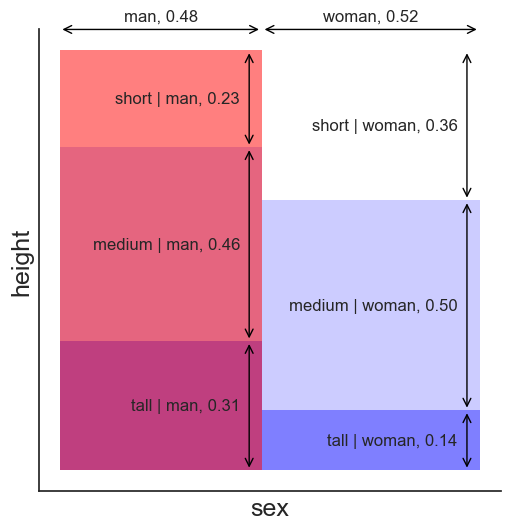

In [ ]:
#| code-summary: "visualize the other way"
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')

# tall given man shaded area
ax.fill_between([0, p_m], 0, p_3_given_m, color="blue", alpha=0.5, edgecolor="none")
# medium given man shaded area
ax.fill_between([0, p_m], p_3_given_m, p_3_given_m+p_2_given_m, color="blue", alpha=0.2, edgecolor="none")

# man shaded area
ax.fill_between([0, p_m], 0, 1.0, color="red", alpha=0.5, edgecolor="none")

# tall given woman shaded area
ax.fill_between([p_m, 1.0], 0, p_3_given_f, color="blue", alpha=0.5, edgecolor="none")
# medium given man shaded area
ax.fill_between([p_m, 1.0], p_3_given_f, p_3_given_f+p_2_given_f, color="blue", alpha=0.2, edgecolor="none")

sns.despine(ax=ax, top=True, right=True)

# tall given man arrow
ax.annotate("",
            (p_m-0.03, 0),
            (p_m-0.03, p_3_given_m),
            ha="right", va="center",
            size=14,
            arrowprops=dict(arrowstyle='<->',
                            color="black",
                            ),
)
ax.text(p_m-0.03, p_3_given_m / 2, f"tall | man, {p_3_given_m:.2f}  ", ha="right", va="center", fontsize=12)
# medium given man arrow
ax.annotate("",
            (p_m-0.03, p_3_given_m),
            (p_m-0.03, p_3_given_m+p_2_given_m),
            ha="right", va="center",
            size=14,
            arrowprops=dict(arrowstyle='<->',
                            color="black",
                            ),
)
ax.text(p_m-0.03, p_3_given_m + p_2_given_m / 2, f"medium | man, {p_2_given_m:.2f}  ", ha="right", va="center", fontsize=12)
# short given man arrow
ax.annotate("",
            (p_m-0.03, 1.0),
            (p_m-0.03, 1.0-p_1_given_m),
            ha="right", va="center",
            size=14,
            arrowprops=dict(arrowstyle='<->',
                            color="black",
                            ),
)
ax.text(p_m-0.03, 1.0 - p_1_given_m / 2, f"short | man, {p_1_given_m:.2f}  ", ha="right", va="center", fontsize=12)

# tall given woman arrow
ax.annotate("",
            (1.0-0.03, 0),
            (1.0-0.03, p_3_given_f),
            ha="right", va="center",
            size=14,
            arrowprops=dict(arrowstyle='<->',
                            color="black",
                            ),
)
ax.text(1.0-0.03, p_3_given_f / 2, f"tall | woman, {p_3_given_f:.2f}  ", ha="right", va="center", fontsize=12)
# medium given woman arrow
ax.annotate("",
            (1.0-0.03, p_3_given_f),
            (1.0-0.03, p_3_given_f+p_2_given_f),
            ha="right", va="center",
            size=14,
            arrowprops=dict(arrowstyle='<->',
                            color="black",
                            ),
)
ax.text(1.0-0.03, p_3_given_f + p_2_given_f / 2, f"medium | woman, {p_2_given_f:.2f}  ", ha="right", va="center", fontsize=12)
# short given woman arrow
ax.annotate("",
            (1.0-0.03, 1.0),
            (1.0-0.03, 1.0-p_1_given_f),
            ha="right", va="center",
            size=14,
            arrowprops=dict(arrowstyle='<->',
                            color="black",
                            ),
)
ax.text(1.0-0.03, 1.0 - p_1_given_f / 2, f"short | woman, {p_1_given_f:.2f}  ", ha="right", va="center", fontsize=12)


# man arrow
ax.annotate("",
            (0, 1.05),
            (p_m, 1.05),
            ha="right", va="center",
            size=14,
            arrowprops=dict(arrowstyle='<->',
                            color="black",
                            ),
)
ax.text(p_m / 2, 1.07, f"man, {p_m:.2f}", ha="center", fontsize=12)
# woman arrow
ax.annotate("",
            (1.0 - p_f, 1.05),
            (1.0, 1.05),
            ha="right", va="center",
            size=14,
            arrowprops=dict(arrowstyle='<->',
                            color="black",
                            ),
)
ax.text(1.0 - (p_f) / 2, 1.07, f"woman, {p_f:.2f}", ha="center", fontsize=12)

ax.set(xticks=[],
       yticks=[],
       # xlim=(0, 1),
       # ylim=(0, 1),
       xlabel="sex",
       ylabel="height",);

The probability that a person is both **man** and **tall** is still the area of the purple rectangle on the bottom left. The rectangle has a different shape, but it has to have the same area. The answer to our question now can be understood thus: 

* 48% of people are men.
* 31% of those are tall.

The answer is 0.48 * 0.31 = 15%, exactly the same result as before.

In mathematical notation, we write this as:

$$
P(\text{tall } \cap \text{ man}) = P(\text{man}) \cdot P(\text{tall|man}).
\tag{2}
$$

<div class="alert alert-primary">
One thing should become clear from the images above. The probability that a person is a man, given that they are tall, **is not the same** as the probability that a person is tall, given that they are a man. In mathematical notation:

$$
P(\text{man|tall}) \neq P(\text{tall|man}).
$$

* $P(\text{man|tall})$: of all tall people, 67% are men.
* $P(\text{tall|man})$: of all men, 31% are tall.
</div>

## Bayes' theorem

When two things are true at the same time, it doesn't matter the order we choose to write them. In mathematical notation:

$$
P(A \cap B) = P(B \cap A).
$$

Because of this, we equate the right-hand sides of Eqs. (1) and (2), and we get Bayes' theorem:

<div class="alert alert-primary">
$$
P(\text{man|tall}) \cdot P(\text{tall}) = P(\text{tall|man}) \cdot P(\text{man})
$$
</div>

Personally, I choose to remember this equation, because it is symmetric. But the more common way to write Bayes' theorem is to solve for $P(\text{man|tall})$:

$$
P(\text{man|tall}) = \frac{P(\text{tall|man}) \cdot P(\text{man})}{P(\text{tall})},
$$

or in general terms:

<div class="alert alert-primary">
$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}.
$$
</div>

Each term has a name:

* $P(A|B)$ is the **posterior**. This is what we are trying to find out: the probability of $A$ given that we know $B$.
* $P(B|A)$ is the **likelihood**. This is the probability of $B$ given that we know $A$.
* $P(A)$ is the **prior**. This is what we know about $A$ before we know anything about $B$.
* $P(B)$ is the **evidence**. This is what we know about $B$ before we know anything about $A$.



## the law of total probability

In the example above, we had enough information to plug all the numbers into Bayes' theorem. But this is not always the case. Sometimes, we don't know $P(B)$, the evidence. In this case, we can compute it using the law of total probability. It is best to give a concrete example.

A famous use of Bayes' theorem is in desease testing.

* A given desease affects 1% of the population.
* A test for the desease is 95% accurate. This means that:
  * If a person has the desease, the test will be positive 95% of the time.
  * If a person does not have the desease, the test will be negative 95% of the time.
* A person is randomly selected from the population, and they test positive. Should they be worried? What is the probability that they actually have the desease?

Let's translate this into the language of Bayes' theorem:

* $A$ is the event "the person has the desease".
* $B$ is the event "the test is positive".
* We need to find $P(A|B)$, the probability that the person has the desease, given that they tested positive.
* $P(A) = 0.01$ is the prior, the probability that a random person has the desease.
* $P(B|A) = 0.95$ is the likelihood, the probability that the test is positive, given that the person has the desease.

We don't know $P(B)$, the evidence, the probability that a random person tests positive. But we can compute it using the law of total probability:

\begin{align*}
P(\text{test is positive}) &= P(\text{test is positive } \textbf{and} \text{ person has the desease}) \\
                           &+ P(\text{test is positive } \textbf{and} \text{ person doesn't have the desease}).
\end{align*}

This has to be true, because a person can either have the desease or not. In a more compact form:

$$
P(B) = P(B \cap A) + P(B \cap A^c),
$$

where $A^c$ is the complement of $A$, i.e., "the person does not have the desease".

Using the definition of conditional probability, we can rewrite this as:
$$
P(B) = P(B|A) \cdot P(A) + P(B|A^c) \cdot P(A^c).
$$
We know all the terms on the right-hand side:

* $P(B|A) = 0.95$, the probability that the test is positive, given that the person has the desease.
* $P(A) = 0.01$, the probability that a random person has the desease.
* $P(A^c) = 0.99$, the probability that a random person does not have the desease.
* $P(B|A^c) = 0.05$, the probability that the test is positive, given that the person does not have the desease. This is 1 minus the accuracy of the test for healthy people.

Plugging in the numbers, we get:

$$
P(B) = 0.95 \cdot 0.01 + 0.05 \cdot 0.99 = 0.059.
$$

Now we have everything we need to plug the numbers into Bayes' theorem:

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} = \frac{0.95 \cdot 0.01}{0.059} = 0.161.
$$

This means that, even if the person tested positive, there is only a 16.1% chance that they actually have the desease. This is counter-intuitive, but it makes sense when we think about it. The desease is very rare, so even if the test is accurate, most of the positive results will be false positives.

In the case that there are several mutually exclusive ways for $B$ to happen, we can generalize the law of total probability:

$$
P(B) = \sum_i P(B \cap A_i) = \sum_i P(B|A_i) \cdot P(A_i),
$$

where the $A_i$ are all the possible ways for $B$ to happen.